Comparing Sales Trends for Multiple Categories in 2022 Scenario: The Marketing Team wants to compare the sales trends for multiple categories in 2022 to identify which category performed best. Requirements: 1. Aggregate the sales data by category for 2022. 2. Plot a time series of sales trends for each category (use order_date to group by month or week). 3. Provide insights on which category had the highest sales growth. Key Features to Use: • category • order_date (for time series analysis) • qty_ordered

C:\Users\bhave\AppData\Local\Temp\ipykernel_20692\132693971.py:38: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhave\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


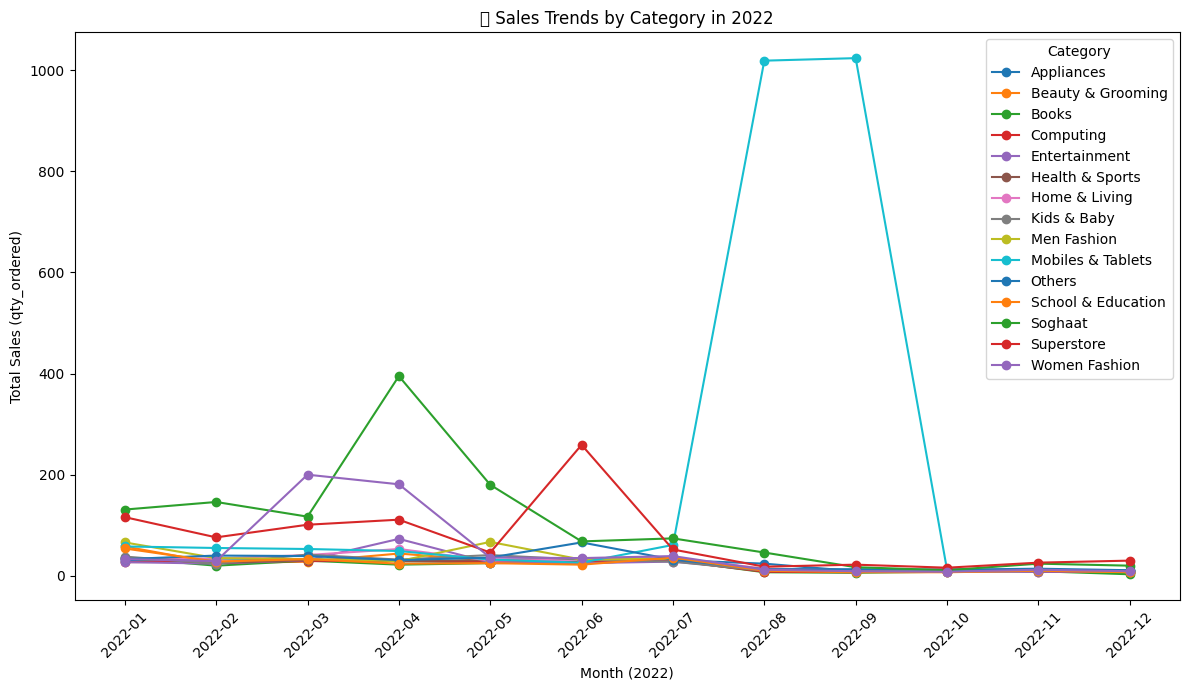


📊 Category Growth from Jan to Dec 2022:
Computing: -19 (📉 Decline)
Entertainment: -19 (📉 Decline)
Appliances: -21 (📉 Decline)
Others: -22 (📉 Decline)
Home & Living: -24 (📉 Decline)
Women Fashion: -24 (📉 Decline)
Health & Sports: -28 (📉 Decline)
Kids & Baby: -28 (📉 Decline)
Books: -32 (📉 Decline)
School & Education: -47 (📉 Decline)
Beauty & Grooming: -49 (📉 Decline)
Mobiles & Tablets: -49 (📉 Decline)
Men Fashion: -58 (📉 Decline)
Superstore: -86 (📉 Decline)
Soghaat: -111 (📉 Decline)

🏆 Best Performing Category in 2022: Computing


In [2]:
# 📌 Task 6: Comparing Sales Trends for Multiple Categories in 2022

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Ensure order_date is datetime & extract year/month
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.to_period("M")  # year-month format

# Step 3: Filter for 2022
df_2022 = df[df['year'] == 2022]

# Step 4: Aggregate sales by category & month
category_trends = (
    df_2022.groupby(["month", "category"], as_index=False)["qty_ordered"]
    .sum()
    .sort_values(by="month")
)

# Step 5: Pivot for plotting (months as x-axis, categories as lines)
pivot_trends = category_trends.pivot(index="month", columns="category", values="qty_ordered").fillna(0)

# Step 6: Plot sales trends
plt.figure(figsize=(12, 7))
for category in pivot_trends.columns:
    plt.plot(pivot_trends.index.astype(str), pivot_trends[category], marker="o", label=category)

plt.xlabel("Month (2022)")
plt.ylabel("Total Sales (qty_ordered)")
plt.title("📈 Sales Trends by Category in 2022")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Insights (calculate growth from Jan to Dec)
growth = {}
for category in pivot_trends.columns:
    first_val = pivot_trends[category].iloc[0]
    last_val = pivot_trends[category].iloc[-1]
    growth[category] = (last_val - first_val)

print("\n📊 Category Growth from Jan to Dec 2022:")
for cat, val in sorted(growth.items(), key=lambda x: x[1], reverse=True):
    status = "📈 Growth" if val > 0 else "📉 Decline"
    print(f"{cat}: {val} ({status})")

best_category = max(growth, key=growth.get)
print(f"\n🏆 Best Performing Category in 2022: {best_category}")
